# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [99]:
import pandas as pd

file_path = r"C:\Users\angel\Downloads\archive (2)\diabetes.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**A) Are there any missing values in the dataset?**

In [100]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


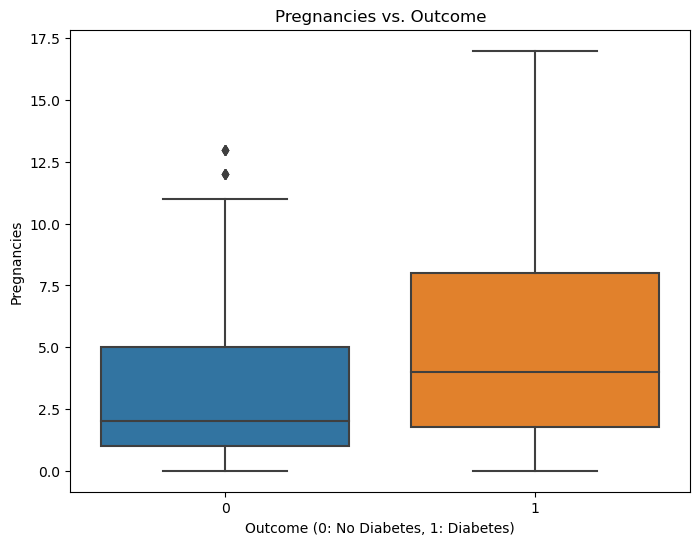

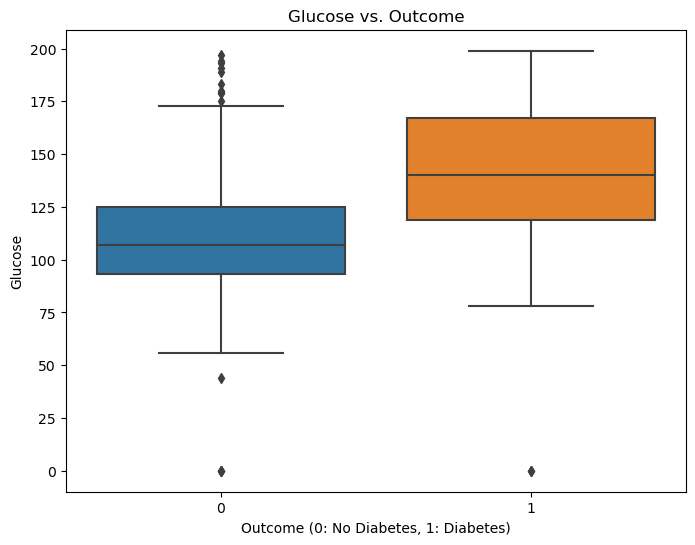

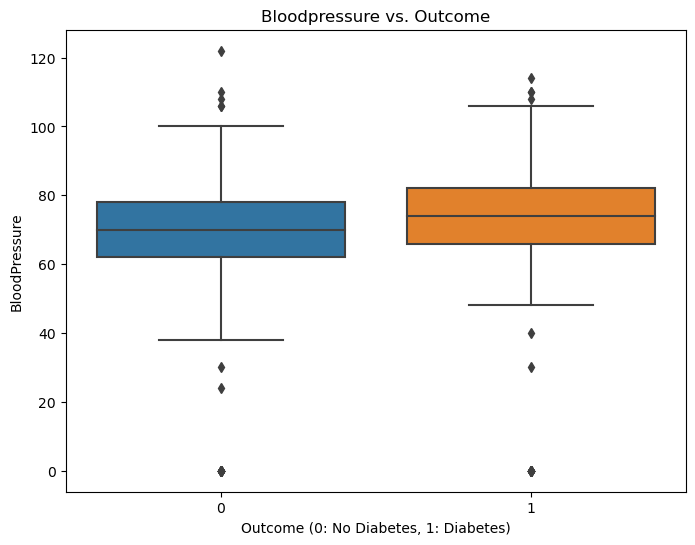

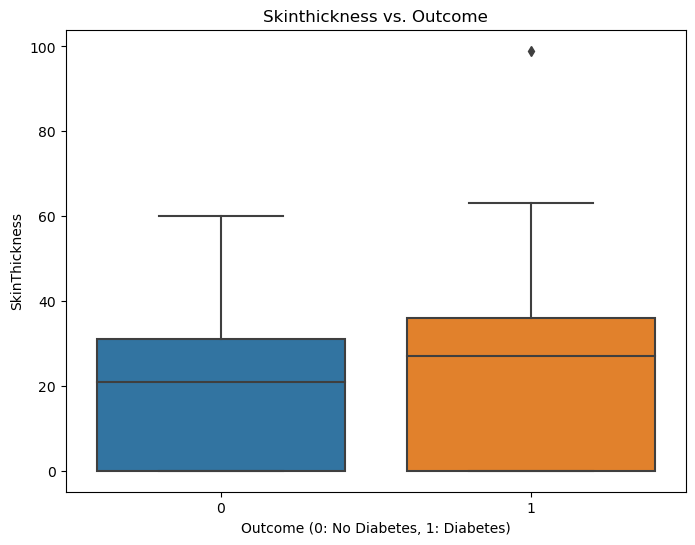

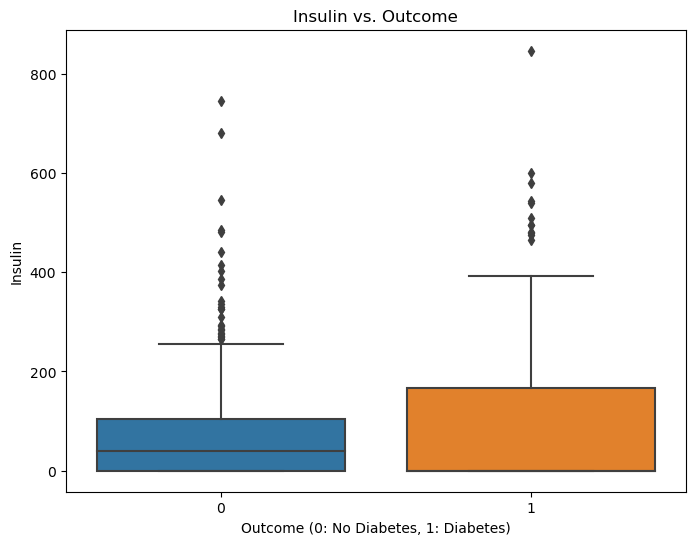

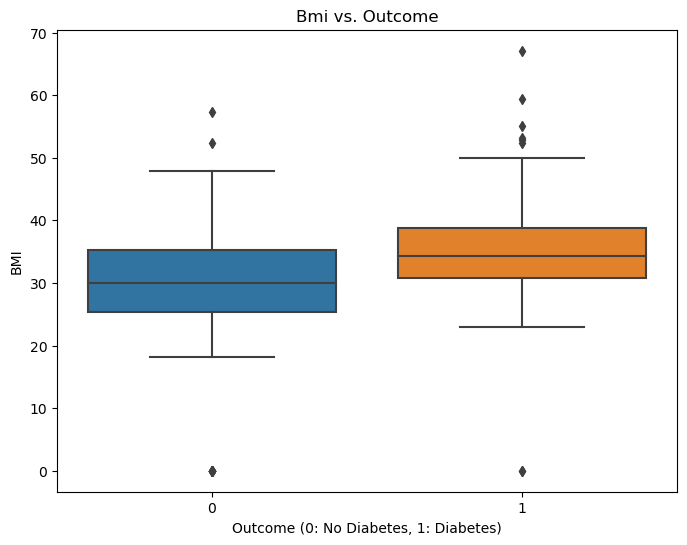

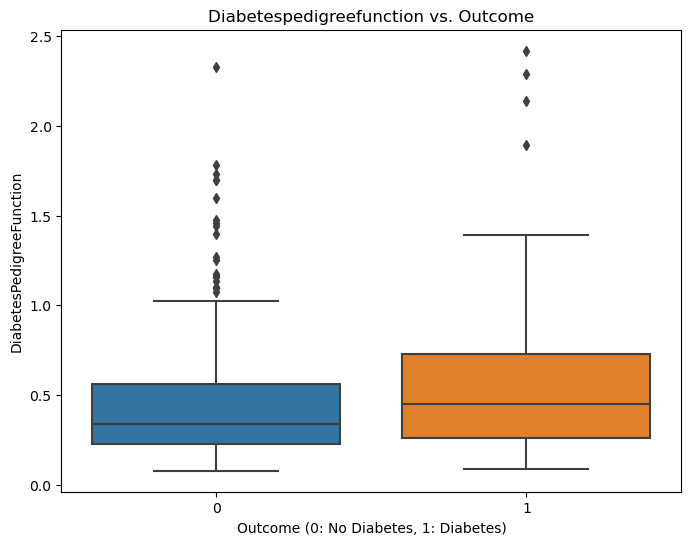

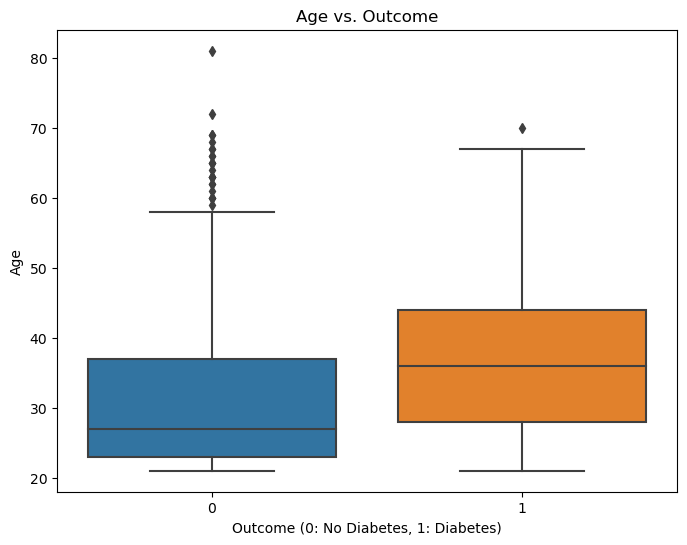

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define predictor variables
predictor_vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                  'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Plot boxplots for each predictor variable
for var in predictor_vars:
    plt.figure(figsize=(8,6))
    sns.boxplot(x='Outcome', y=var, data=df)
    plt.title(f'{var.capitalize()} vs. Outcome')
    plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
    plt.ylabel(var)
    plt.show()

**B) How are the predictor variables related to the outcome variable?**

Answer: 
- Pregnancies: Inverse relationship between the number of pregnancies and the likelihood of diabetes.
- Gluclose: Positive correlation between glucose levels and the likelihood of diabetes.
- Blood Pressure: Individuals without diabetes have a higher median blood pressure compared to those with diabetes.
- Skin Thickness: Individuals with diabetes is associated with having lower skin thickness.
- Insulin: Insulin levels are lower in people with diabetes.
- BMI: Positive correlation between higher BMI and the likelihood of diabetes.
- Diabetes Pedigree Function: The lower the diabetes pedigree function is the higher risk of diabetes.
- Age: Potential relationship between older age and diabetes risk. 

**C Are there any outliers in the predictor variables?**
- There are considerable amount of outliers for each predictive variables that are seen as individual points beyond the whiskers of the boxplot.

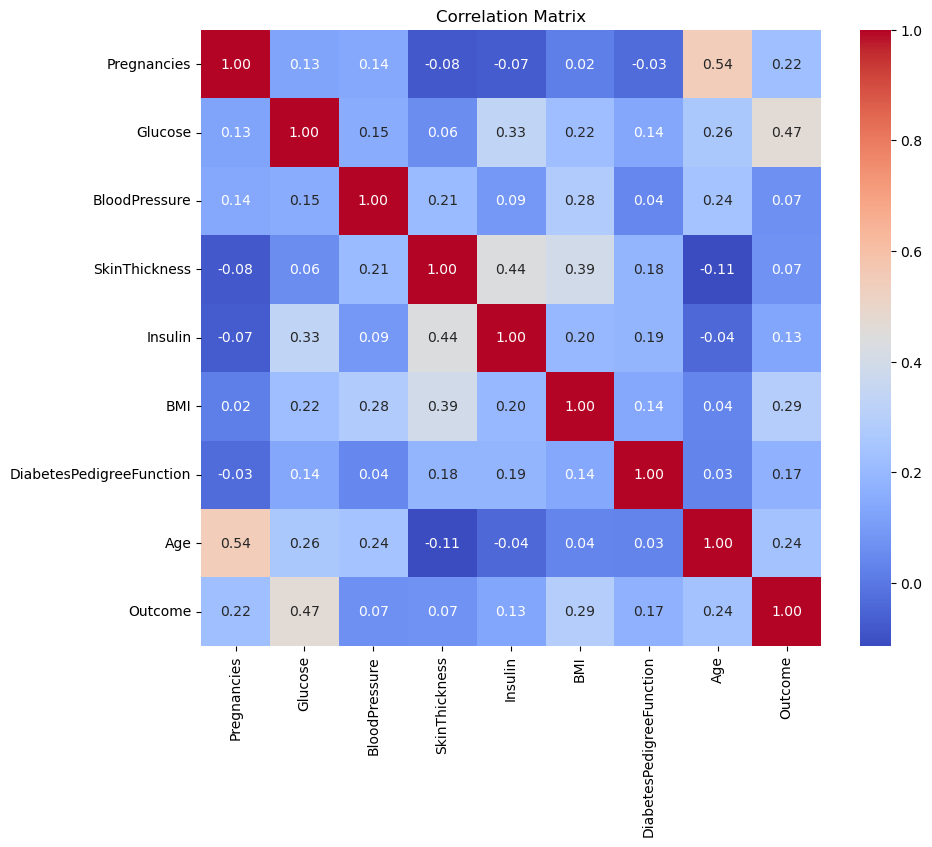

In [104]:
# Calculating the correlation matrix
correlation_matrix = df.corr()

# Visualizing correlation matrix 
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**D) What is the correlation between the predictor variables?**

Answer: From our heatchart, we can conclude that the predictor variables that have the highest correlation with our outcome (diabetes) is the "Glucose" 
variable with a correlation coefficient of 0.47. 

**E) How are the predictor variables related to each other?**

Answer: Majority of the predictor variables dont have a significant enough correlation with each other that is worthy of noting but there are a few that have a coefficient around 0.5.
These are Pregnancies with Age (0.54), and Insulin with Skin Thickness (0.44).

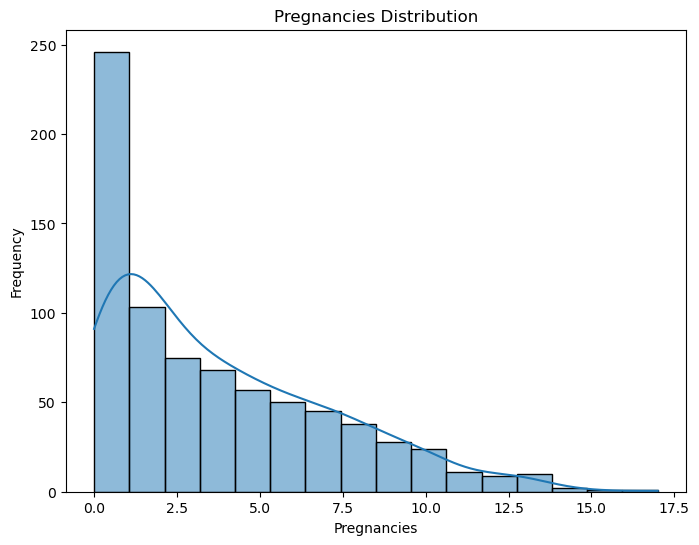

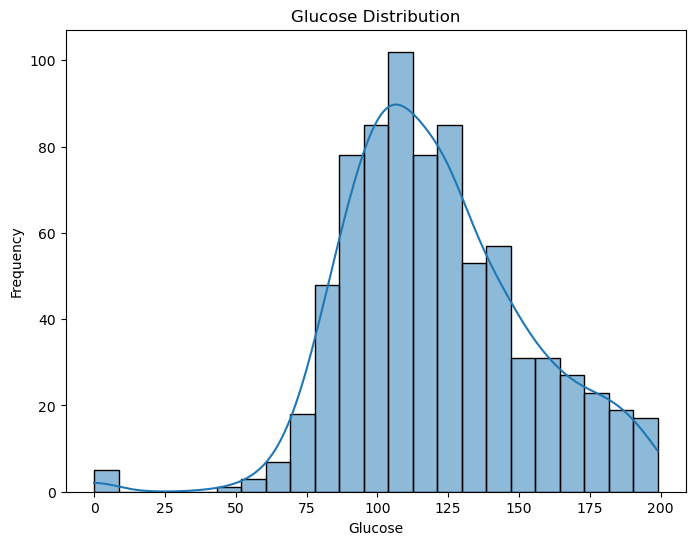

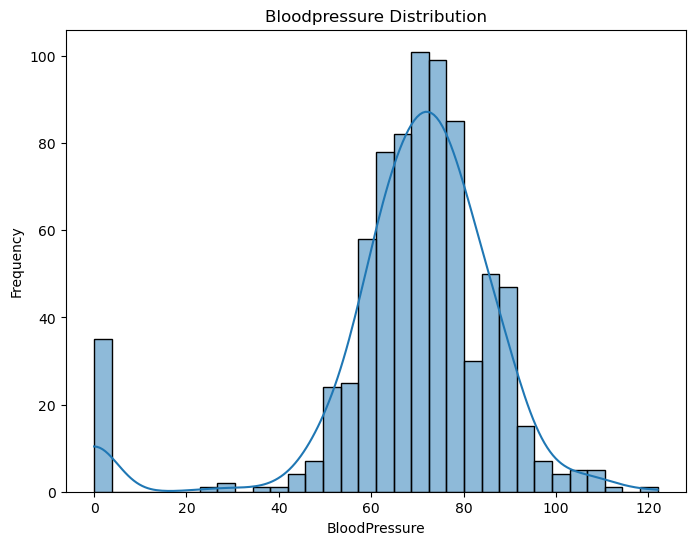

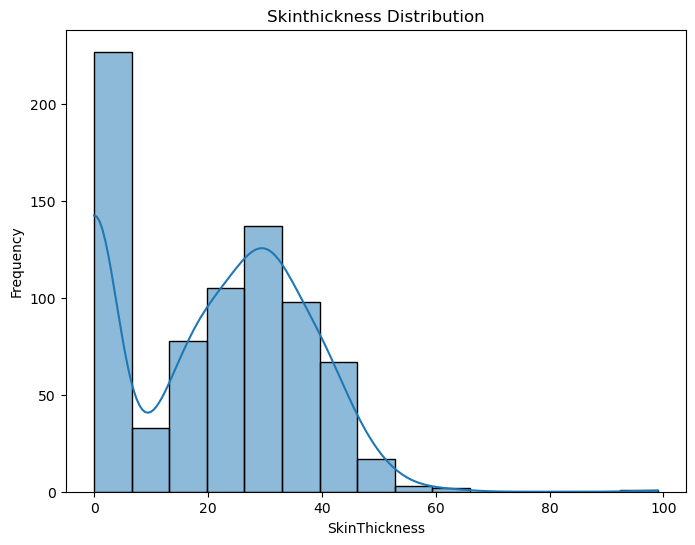

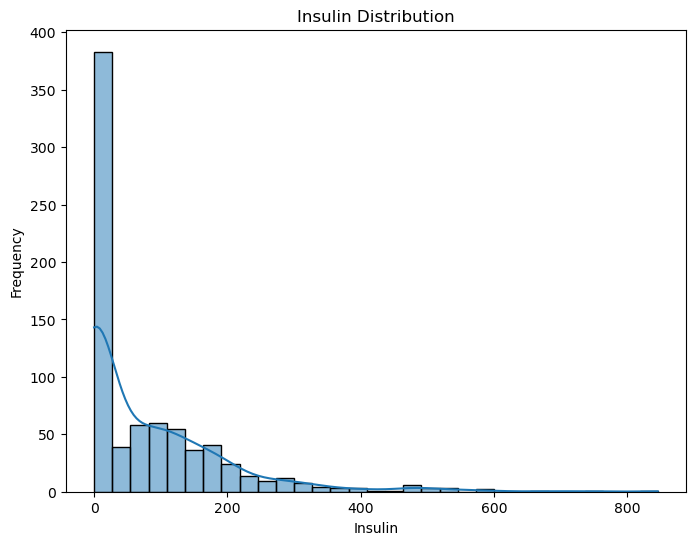

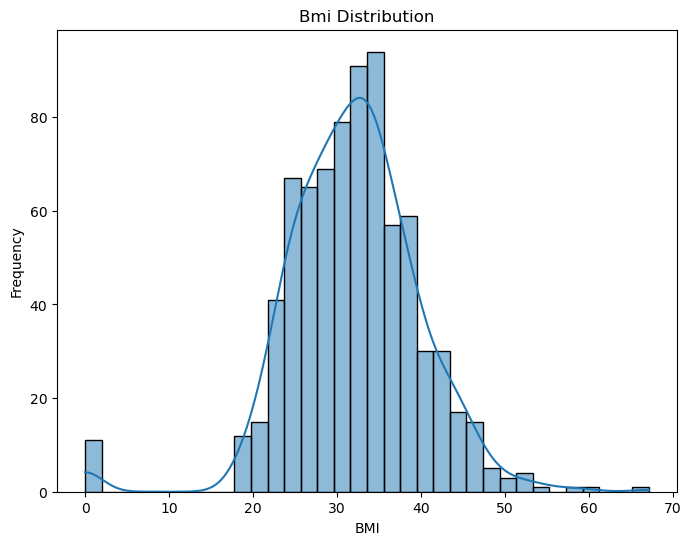

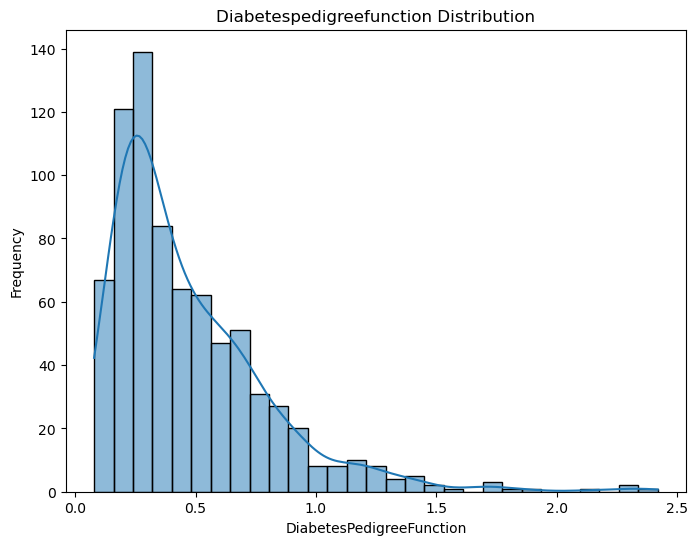

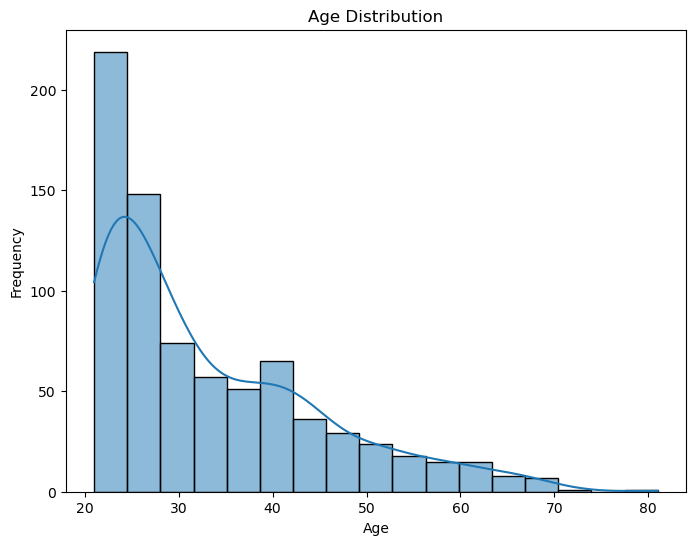

In [105]:
# Plotting histograms for each predictor variables
for var in predictor_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=var, kde=True)
    plt.title(f'{var.capitalize()} Distribution')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

**F) What is the distribution of each predictor variable?**

Answer: 
- Pregnancies: Positively skewed (0.90). Data points are concentrated on the lower end of the scale. Distribution is relatively less peaked compared to a normal distribution.
- Glucose: Approximately symmetric (0.17) with a slight positive skew. Moderate peakedness based on the kurtosis level. 
- Blood Pressure: Negatively skewed (1.84), more concentration of data on the higher end of the scale. Has a heavier tail and we can see an outlier. 
- Skin Thickness: Approximately symmetric (0.11) with a slight positive skew. Less peaked compared to normal distribution and can see a possible outlier. 
- Insulin: Highly positively skewed (2.27). Points are concentration on the lower end of the scale. Has heavy tails to the right. 
- BMI: Approxiately symmetric (-0.43) with a slight negative skew. Relatively more peaked compared to a normal distribution. 
- Diabetes Pedigree Function: Highley positively skewed (1.92). Points are concentration on the lower end of the scale. Contains heavy tails on the right.
- Age: Positively skewed (1.13). Data points are concentration on the younger end of the scale. Less peaked compared to a normal distribution.

**G) How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?**

Answer: 
- Pregnancies: More individuals with diabetes have a higher number of pregnancies compared to the non-diabetes group.
- Glucose: Individuals with diabetes tend to have slightly higher glucose levels compared to those without diabetes.
- Blood Pressure: Blood pressure levels are comparable between people with and without diabetes, but those with diabetes may have slightly lower mean blood pressure.
- Skin Thickness: Skin thickness is slightly lower for individuals with diabetes compared to those without diabetes. 
- Insulin: Individuals with diabetes have significantly higher insulin levels compared to those without diabetes. 
- BMI: BMI is slightly higher for individuals with diabetes compared to those without diabetes.
- Diabetes Pedigree Function: The diabetes pedigree functioni tends to be slightly higher for individuals with diabetes compared to those without diabetes. 
- Age: Individuals with diabetes tend to be slightly older compated to those without diabetes. 

**H) What is the average age of the individuals in the dataset?**

In [36]:
# Calculate average age
average_age = df['Age'].mean()
print("Average Age:", average_age)

Average Age: 33.240885416666664


**I) What is the average glucose level for individuals with diabetes and without diabetes?**

In [37]:
# Calculate average glucose level for each outcome category
average_glucose_diabetes = df[df['Outcome'] == 1]['Glucose'].mean()
average_glucose_no_diabetes = df[df['Outcome'] == 0]['Glucose'].mean()
print("Average Glucose Level (Diabetes):", average_glucose_diabetes)
print("Average Glucose Level (No Diabetes):", average_glucose_no_diabetes)

Average Glucose Level (Diabetes): 141.25746268656715
Average Glucose Level (No Diabetes): 109.98


**J) What is the average BMI for individuals with diabetes and without diabetes?**

In [106]:
# Calculate average BMI for each outcome category
average_bmi_diabetes = df[df['Outcome'] == 1]['BMI'].mean()
average_bmi_no_diabetes = df[df['Outcome'] == 0]['BMI'].mean()
print("Average BMI (Diabetes):", average_bmi_diabetes)
print("Average BMI (No Diabetes):", average_bmi_no_diabetes)

Average BMI (Diabetes): 35.14253731343284
Average BMI (No Diabetes): 30.3042


# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

**A) Handling missing values**

Answer: There are no missing values in this data


**B) Handling outliers**

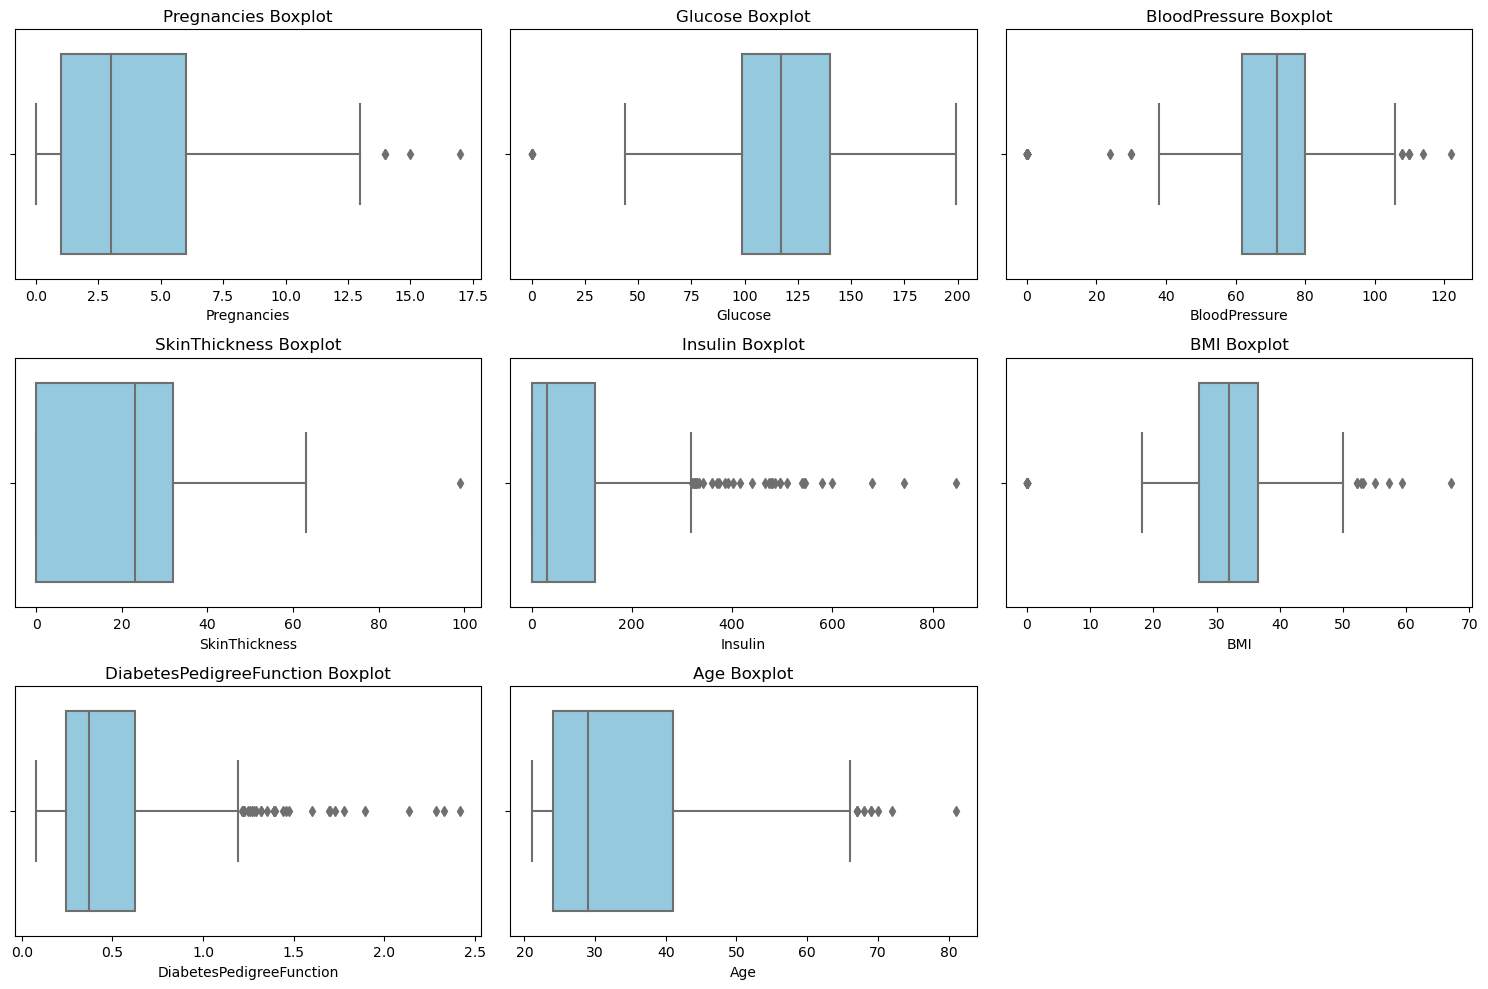

In [107]:
import seaborn as sns

# Plot boxplots for each predictor variable
plt.figure(figsize=(15, 10))
for i, var in enumerate(predictor_vars, start=1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[var], color='skyblue')
    plt.title(f'{var} Boxplot')
plt.tight_layout()
plt.show()

In [108]:
# Define a function to remove outliers based on a threshold
def remove_outliers(df, column, threshold):
    return df[(df[column] >= threshold[0]) & (df[column] <= threshold[1])]

# Setting thresholds on the predictor variables that contains major outliers
thresholds = {
    'Glucose': (0, 300),  
    'BloodPressure': (0, 150),  
    'BMI': (0, 50),  
    'DiabetesPedigreeFunction': (0, 2),  
}

# Remove outliers for each predictor variable based on the defined thresholds
for column, threshold in thresholds.items():
    df = remove_outliers(df, column, threshold)

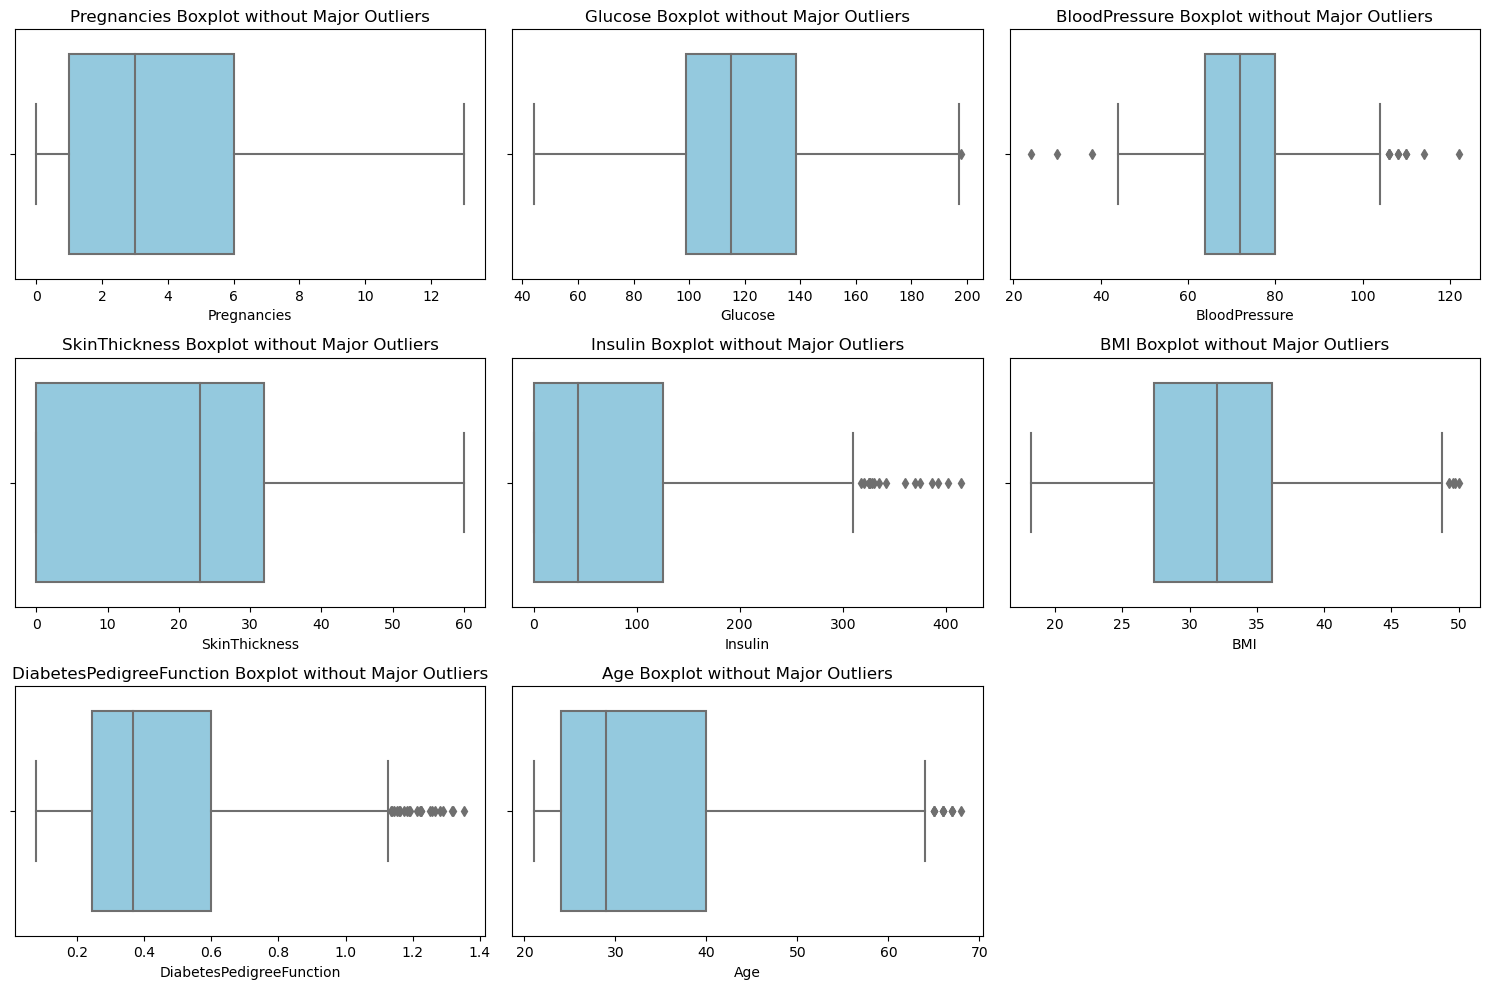

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the predictor variables
predictor_vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Define a function to remove outliers
def remove_outliers(df, variable, threshold=3):
    z_scores = (df[variable] - df[variable].mean()) / df[variable].std()
    df_filtered = df[(z_scores < threshold) & (z_scores > -threshold)]
    return df_filtered

# Remove outliers for each predictor variable
df_no_outliers = df.copy()  
for var in predictor_vars:
    df_no_outliers = remove_outliers(df_no_outliers, var)

# Plot boxplots for each predictor variable without major outliers
plt.figure(figsize=(15, 10))
for i, var in enumerate(predictor_vars, start=1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df_no_outliers[var], color='skyblue')
    plt.title(f'{var} Boxplot without Major Outliers')
plt.tight_layout()
plt.show()

**C) Scaling and normalization**

In [110]:
from sklearn.preprocessing import StandardScaler

# Scale the data using StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [111]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [112]:
df_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.634375,0.863100,0.152545,0.930995,-0.703547,0.252382,0.541616,1.413023,1.382584
1,-0.851460,-1.116513,-0.161677,0.550727,-0.703547,-0.681146,-0.363092,-0.196760,-0.723283
2,1.228708,1.962884,-0.266418,-1.287234,-0.703547,-1.121238,0.689123,-0.112035,1.382584
3,-0.851460,-0.990823,-0.161677,0.170459,0.150100,-0.481105,-0.966232,-1.044014,-0.723283
4,0.337208,-0.142418,0.257286,-1.287234,-0.703547,-0.814508,-0.854782,-0.281485,-0.723283
...,...,...,...,...,...,...,...,...,...
752,1.823042,-0.613754,0.362026,1.754908,0.931097,0.159029,-0.953120,2.514453,-0.723283
753,-0.554293,0.046117,0.047804,0.423971,-0.703547,0.679138,-0.399150,-0.535662,-0.723283
754,0.337208,0.014694,0.152545,0.170459,0.313565,-0.734491,-0.710553,-0.281485,-0.723283
755,-0.851460,0.171806,-0.475899,-1.287234,-0.703547,-0.214382,-0.369648,1.158846,1.382584


**D) Feature Engineering**

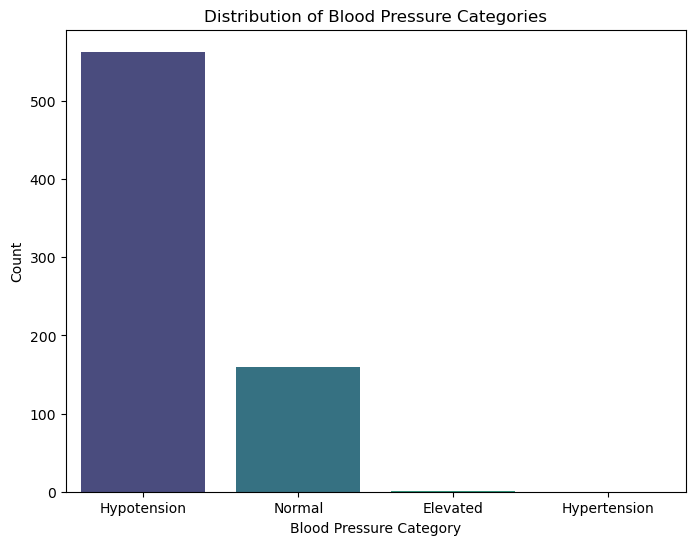

In [113]:
# Define bins for blood pressure categories
bins = [0, 80, 120, 130, np.inf]
labels = ['Hypotension', 'Normal', 'Elevated', 'Hypertension']

# Create a new feature 'BloodPressure_Category' based on blood pressure
df['BloodPressure_Category'] = pd.cut(df['BloodPressure'], bins=bins, labels=labels)

# Plot the count of each blood pressure category
plt.figure(figsize=(8, 6))
sns.countplot(x='BloodPressure_Category', data=df, palette='viridis')
plt.title('Distribution of Blood Pressure Categories')
plt.xlabel('Blood Pressure Category')
plt.ylabel('Count')
plt.show()

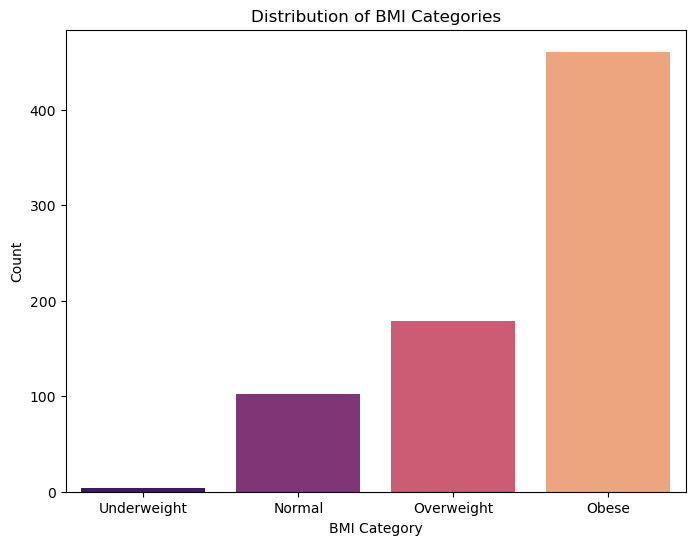

In [114]:
# Create a new feature 'BMI_Category' based on BMI
df['BMI_Category'] = pd.cut(df['BMI'], bins=[0, 18.5, 24.9, 29.9, np.inf], 
    labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Plotting the BMI Category
plt.figure(figsize=(8, 6))
sns.countplot(x='BMI_Category', data=df, palette='magma')
plt.title('Distribution of BMI Categories')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.show()

In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert categorical variables to dummy variables
categorical_cols = ['BloodPressure_Category', 'BMI_Category']  # Assuming you have created these columns
df_dummies = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df_dummies

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BloodPressure_Category_Normal,BloodPressure_Category_Elevated,BloodPressure_Category_Hypertension,BMI_Category_Normal,BMI_Category_Overweight,BMI_Category_Obese
0,6,148,72,35,0,33.6,0.627,50,1,False,False,False,False,False,True
1,1,85,66,29,0,26.6,0.351,31,0,False,False,False,False,True,False
2,8,183,64,0,0,23.3,0.672,32,1,False,False,False,True,False,False
3,1,89,66,23,94,28.1,0.167,21,0,False,False,False,False,True,False
5,5,116,74,0,0,25.6,0.201,30,0,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,False,False,False,False,False,True
764,2,122,70,27,0,36.8,0.340,27,0,False,False,False,False,False,True
765,5,121,72,23,112,26.2,0.245,30,0,False,False,False,False,True,False
766,1,126,60,0,0,30.1,0.349,47,1,False,False,False,False,False,True


**E) Handling imbalanced data**

In [116]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest with class weights
clf = RandomForestClassifier(class_weight='balanced', random_state=42)

print(clf)

RandomForestClassifier(class_weight='balanced', random_state=42)


# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

**A) Training the models**

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Split the data into train and test sets
X = df_dummies.drop(columns=['Outcome'])
y = df_dummies['Outcome'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression Model 
logistic_reg = LogisticRegression(max_iter=1000, random_state=42)
logistic_reg.fit(X_train, y_train)

# Train Random Forest Classifier (Ensemble model)
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**B) Model evaluation**

In [128]:
# Evaluate Logistic Regression Model
y_pred_lr = logistic_reg.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_f1_score = f1_score(y_test, y_pred_lr)
lr_roc_auc = roc_auc_score(y_test, y_pred_lr)

# Print evaluation metrics for Logistic Regression
print("Logistic Regression:")
print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1 Score:", lr_f1_score)
print("ROC AUC Score:", lr_roc_auc)
print()

Logistic Regression:
Accuracy: 0.7763157894736842
Precision: 0.7258064516129032
Recall: 0.569620253164557
F1 Score: 0.6382978723404256
ROC AUC Score: 0.7277631467165067



In [129]:
# Evaluate Random Forest classifier
y_pred_rf = random_forest.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1_score = f1_score(y_test, y_pred_rf)
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)

# Print evaluation metrics for Random Forest classifier
print("Random Forest Classifier:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1_score)
print("ROC AUC Score:", rf_roc_auc)

Random Forest Classifier:
Accuracy: 0.7675438596491229
Precision: 0.6805555555555556
Recall: 0.620253164556962
F1 Score: 0.6490066225165563
ROC AUC Score: 0.7329453742247898


**C) Model Comparison**

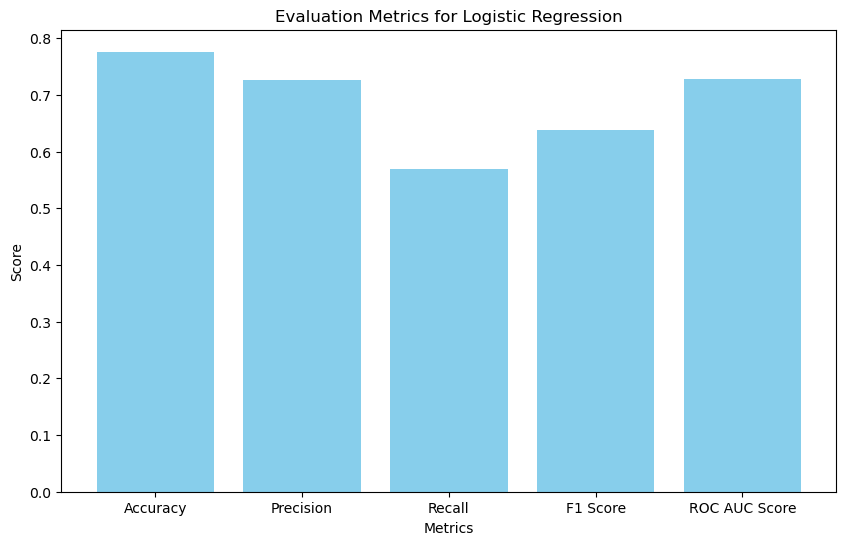

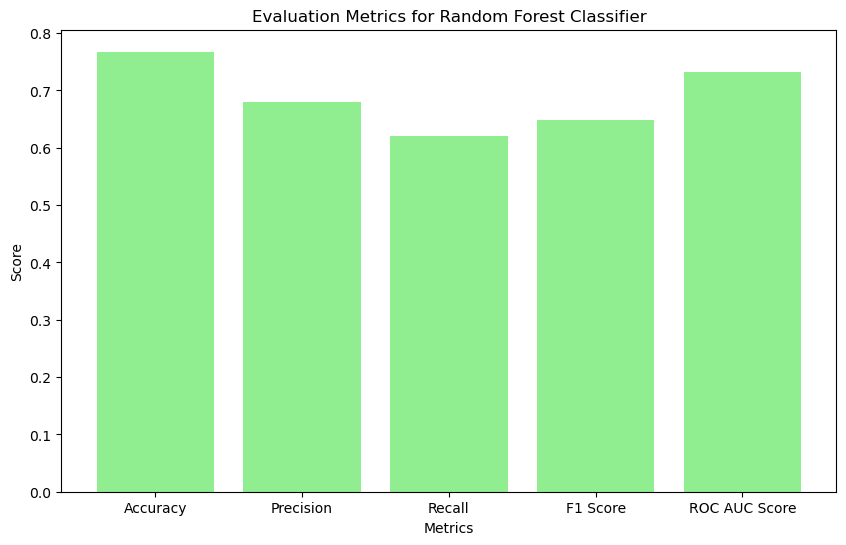

In [131]:
import matplotlib.pyplot as plt

# Evaluation metrics for Logistic Regression
lr_metrics = {
    'Accuracy': lr_accuracy,
    'Precision': lr_precision,
    'Recall': lr_recall,
    'F1 Score': lr_f1_score,
    'ROC AUC Score': lr_roc_auc}

# Evaluation metrics for Random Forest Classifier
rf_metrics = {
    'Accuracy': rf_accuracy,
    'Precision': rf_precision,
    'Recall': rf_recall,
    'F1 Score': rf_f1_score,
    'ROC AUC Score': rf_roc_auc}

# Plotting evaluation metrics for Logistic Regression
plt.figure(figsize=(10, 6))
plt.bar(lr_metrics.keys(), lr_metrics.values(), color='skyblue')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Evaluation Metrics for Logistic Regression')
plt.show()

# Plotting evaluation metrics for Random Forest Classifier
plt.figure(figsize=(10, 6))
plt.bar(rf_metrics.keys(), rf_metrics.values(), color='lightgreen')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Evaluation Metrics for Random Forest Classifier')
plt.show()

In [139]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Define the models
logistic_reg = LogisticRegression(max_iter=2000, random_state=42)
random_forest = RandomForestClassifier(random_state=42)

# Perform k-fold cross-validation (let's use k=5)
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation for Logistic Regression
lr_cv_accuracy = cross_val_score(logistic_reg, X, y, cv=k_fold, scoring='accuracy')
lr_cv_precision = cross_val_score(logistic_reg, X, y, cv=k_fold, scoring='precision')
lr_cv_recall = cross_val_score(logistic_reg, X, y, cv=k_fold, scoring='recall')
lr_cv_f1_score = cross_val_score(logistic_reg, X, y, cv=k_fold, scoring='f1')
lr_cv_roc_auc = cross_val_score(logistic_reg, X, y, cv=k_fold, scoring='roc_auc')

# Cross-validation for Random Forest Classifier
rf_cv_accuracy = cross_val_score(random_forest, X, y, cv=k_fold, scoring='accuracy')
rf_cv_precision = cross_val_score(random_forest, X, y, cv=k_fold, scoring='precision')
rf_cv_recall = cross_val_score(random_forest, X, y, cv=k_fold, scoring='recall')
rf_cv_f1_score = cross_val_score(random_forest, X, y, cv=k_fold, scoring='f1')
rf_cv_roc_auc = cross_val_score(random_forest, X, y, cv=k_fold, scoring='roc_auc')

# Print average performance across all folds for both the models
print("Logistic Regression:")
print("CV Accuracy:", lr_cv_accuracy.mean())
print("CV Precision:", lr_cv_precision.mean())
print("CV Recall:", lr_cv_recall.mean())
print("CV F1 Score:", lr_cv_f1_score.mean())
print("CV ROC AUC Score:", lr_cv_roc_auc.mean())
print()

print("Random Forest Classifier:")
print("CV Accuracy:", rf_cv_accuracy.mean())
print("CV Precision:", rf_cv_precision.mean())
print("CV Recall:", rf_cv_recall.mean())
print("CV F1 Score:", rf_cv_f1_score.mean())
print("CV ROC AUC Score:", rf_cv_roc_auc.mean())

Logistic Regression:
CV Accuracy: 0.7635151620773788
CV Precision: 0.7051796937422262
CV Recall: 0.5480444685559774
CV F1 Score: 0.6121493138946885
CV ROC AUC Score: 0.8333272462187958

Random Forest Classifier:
CV Accuracy: 0.7767079121645172
CV Precision: 0.70477101213213
CV Recall: 0.6094024645431295
CV F1 Score: 0.6506845259561019
CV ROC AUC Score: 0.8342419737176504


In [143]:
# Train Logistic Regression Model 
logistic_reg.fit(X_train, y_train)

# Evaluate Logistic Regression Model on Test Set
y_pred_lr_test = logistic_reg.predict(X_test)
lr_accuracy_test = accuracy_score(y_test, y_pred_lr_test)
lr_precision_test = precision_score(y_test, y_pred_lr_test)
lr_recall_test = recall_score(y_test, y_pred_lr_test)
lr_f1_score_test = f1_score(y_test, y_pred_lr_test)
lr_roc_auc_test = roc_auc_score(y_test, y_pred_lr_test)

# Print evaluation metrics for Logistic Regression on Test Set
print("Logistic Regression - Test Set:")
print("Accuracy:", lr_accuracy_test)
print("Precision:", lr_precision_test)
print("Recall:", lr_recall_test)
print("F1 Score:", lr_f1_score_test)
print("ROC AUC Score:", lr_roc_auc_test)
print()

Logistic Regression - Test Set:
Accuracy: 0.7763157894736842
Precision: 0.7258064516129032
Recall: 0.569620253164557
F1 Score: 0.6382978723404256
ROC AUC Score: 0.7277631467165067



In [144]:
# Evaluate Random Forest classifier on Test Set
y_pred_rf_test = random_forest.predict(X_test)
rf_accuracy_test = accuracy_score(y_test, y_pred_rf_test)
rf_precision_test = precision_score(y_test, y_pred_rf_test)
rf_recall_test = recall_score(y_test, y_pred_rf_test)
rf_f1_score_test = f1_score(y_test, y_pred_rf_test)
rf_roc_auc_test = roc_auc_score(y_test, y_pred_rf_test)

# Print evaluation metrics for Random Forest classifier on Test Set
print("Random Forest Classifier - Test Set:")
print("Accuracy:", rf_accuracy_test)
print("Precision:", rf_precision_test)
print("Recall:", rf_recall_test)
print("F1 Score:", rf_f1_score_test)
print("ROC AUC Score:", rf_roc_auc_test)

Random Forest Classifier - Test Set:
Accuracy: 0.7675438596491229
Precision: 0.6805555555555556
Recall: 0.620253164556962
F1 Score: 0.6490066225165563
ROC AUC Score: 0.7329453742247898


# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

1. Features like glucose, BMI, and age appeared to have an importance in predicting diabetes risk, as indicated by their strong correlation with the target variable during our EDA process and their impact on the model's performance.

2. Both Logistic Regression and Random Forest Classifier had accuracies around 77% on the test set which indicated that both of them showed promising performances in predicting diabetes in a patient. 

3. There are some positives in using on model over the other. The Logistic Regression resulted in a slightly higher accuracy, precision, and roc-auc score compared to the Random Forrest Classifier (RFC). However the RFC produced a marginally better recall and F1 score. 

4. Considering in a clinical context, where the cost of missing positive cases may differ from the cost of false alarms, the choice between these models could be tailored to the specific requirements and priorities of healthcare practitioners and institutions. But since we are predicting if someone has diabetes, accuracy and precision might have a more impact determining which model to use. This is because in something important as detecting diabetes in order for proper treatment, a higher accuracy and precicion might be needed. 